Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

Rodrigo Mejía Jiménez - A01752113

# Introducción

El dataset que se elegirá sera el de "German Traffic Sign Recognition Benchmark" extraido de kaggle.

La problemática que resuelve es el de clasificación de señales de tránsito, esta clasificación nos puede ayudar en diversas áreas como la parte de autos autonomos. Este es la problemática principal que se busca resolver con este modelo para que un sistema sea capaz de diferenciar entre los diferentes señalamientos que existen en un camino y ya llevado a una escala mayor, que el sistema pueda tomar acciones dependiendo el señalamiento

# Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Cargar dataset desde kaggle

In [2]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_

# Variables globales

El dataset tiene 43 clases de señalamientos de tránsito

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)


/content


# Datos


In [4]:
#Recuperación de las imágenes y sus etiquetas
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    print(path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

/content/train/0
/content/train/1
/content/train/2
/content/train/3
/content/train/4
/content/train/5
/content/train/6
/content/train/7
/content/train/8
/content/train/9
/content/train/10
/content/train/11
/content/train/12
/content/train/13
/content/train/14
/content/train/15
/content/train/16
/content/train/17
/content/train/18
/content/train/19
/content/train/20
/content/train/21
/content/train/22
/content/train/23
/content/train/24
/content/train/25
/content/train/26
/content/train/27
/content/train/28
/content/train/29
/content/train/30
/content/train/31
/content/train/32
/content/train/33
/content/train/34
/content/train/35
/content/train/36
/content/train/37
/content/train/38
/content/train/39
/content/train/40
/content/train/41
/content/train/42


In [5]:
#Convertir listas en numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Separación de conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Convercion de etiquetas en one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Visualizar entrenamiento

Se desplegan las imagenes de train para poder observar el dataset

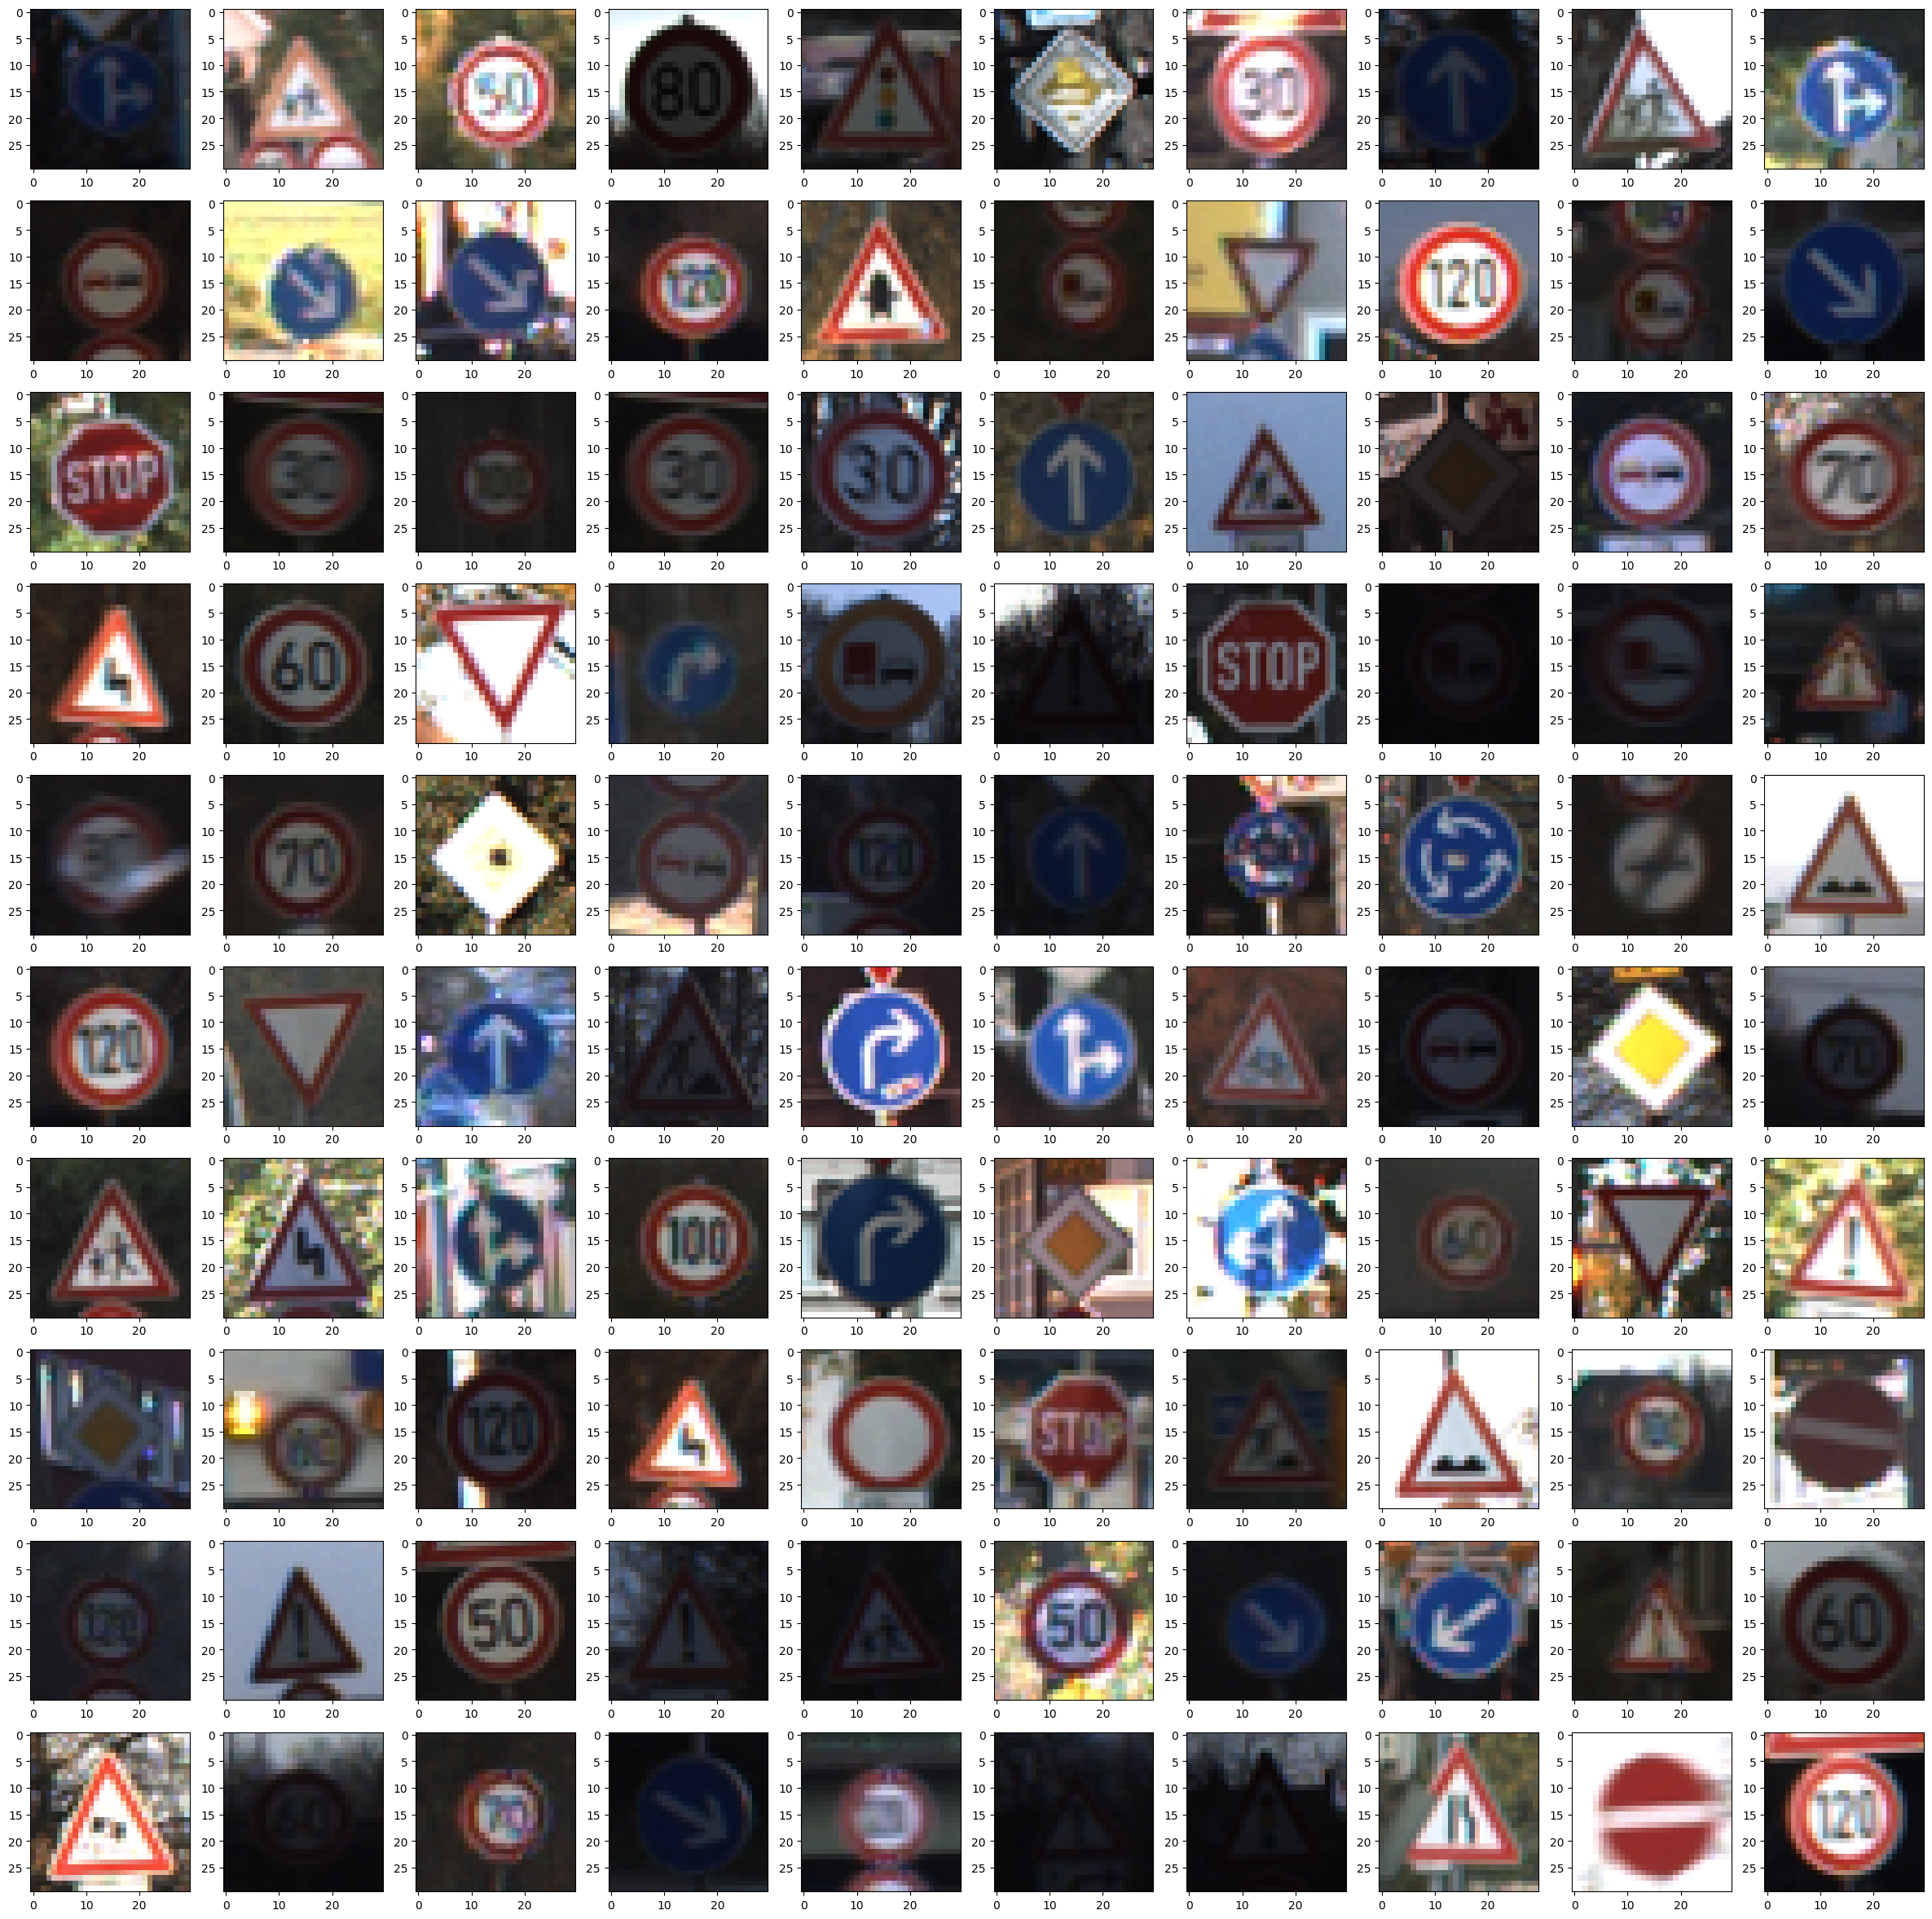

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(30,30))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])


# Desarrollo del modelo

Las redes neuronales convolucionales utilizadas en la clasificación de imágenes de tráfico y en muchas otras tareas relacionadas con la visión por computadora. Las razones son las siguientes:

1. **Captura de Características Locales:**
   - Las CNN están diseñadas para capturar características locales en la imagen, como bordes, texturas y patrones visuales específicos. Esto es crucial en la clasificación de imágenes de tráfico, donde la forma y la apariencia de las señales, luces y marcas de carretera son características importantes.

2. **Compartición de Parámetros:**
   - Las capas convolucionales comparten parámetros, lo que reduce significativamente el número de parámetros en comparación con una red neuronal completamente conectada. Esto es beneficioso en situaciones donde hay una gran cantidad de datos de entrenamiento y ayuda a evitar el sobreajuste.

3. **Invarianza a la Translación:**
   - Las capas convolucionales son capaces de aprender características invariantes a la translación. En el contexto del tráfico, esto significa que la red puede reconocer patrones independientemente de su ubicación exacta en la imagen, lo que es útil para identificar señales de tráfico o marcas de carretera en diferentes posiciones ya que en el datset estan distribuidas en diferentes posiciones no centradas.

4. **Jerarquía de Características:**
   - Las primeras capas pueden capturar características simples como bordes, mientras que las capas más profundas pueden combinar estas características simples para reconocer características más complejas. Esto es útil para la clasificación de imágenes de tráfico, donde las señales y marcas de carretera pueden tener una variedad de características a diferentes niveles de complejidad.

In [7]:
#Construir el modelo usando redes neuronales convolucionales

#capa de entrada
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
                 input_shape=X_train.shape[1:]))
#capas intermedias
#define una capa convolucional en un modelo de red neuronal con 32 filtros de tamaño 5x5, seguido por una función de activación ReLU.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# La operación de max pooling reduce las dimensiones espaciales de la representación de entrada, tomando el valor máximo de un conjunto de valores vecinos en la entrada.
model.add(MaxPool2D(pool_size=(2, 2)))
# Se utiliza Dropout para evitar el sobreajuste al reducir la dependencia de unidades específicas.
#Esto hace que en el entrenamiento se "apaga" aleatoriamente un porcentaje de las neuronas en la capa
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
#salida
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilacion del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#entrenamiento y guardar modelo
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_test, y_test))
model.save("mi_modelo1.h5")


Epoch 1/15
981/981 [==============================] - 20s 8ms/step - loss: 3.6521 - accuracy: 0.0575 - val_loss: 3.2747 - val_accuracy: 0.1125
Epoch 2/15
981/981 [==============================] - 9s 9ms/step - loss: 1.9578 - accuracy: 0.4325 - val_loss: 1.0764 - val_accuracy: 0.7017
Epoch 3/15
981/981 [==============================] - 6s 6ms/step - loss: 1.0600 - accuracy: 0.6743 - val_loss: 0.4677 - val_accuracy: 0.8720
Epoch 4/15
981/981 [==============================] - 8s 8ms/step - loss: 0.6971 - accuracy: 0.7858 - val_loss: 0.3535 - val_accuracy: 0.8985
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.5099 - accuracy: 0.8446 - val_loss: 0.2058 - val_accuracy: 0.9370
Epoch 6/15
981/981 [==============================] - 8s 8ms/step - loss: 0.4173 - accuracy: 0.8758 - val_loss: 0.1780 - val_accuracy: 0.9452
Epoch 7/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3542 - accuracy: 0.8957 - val_loss: 0.1525 - val_accuracy: 0.9555
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Evaluación del modelo entrenado

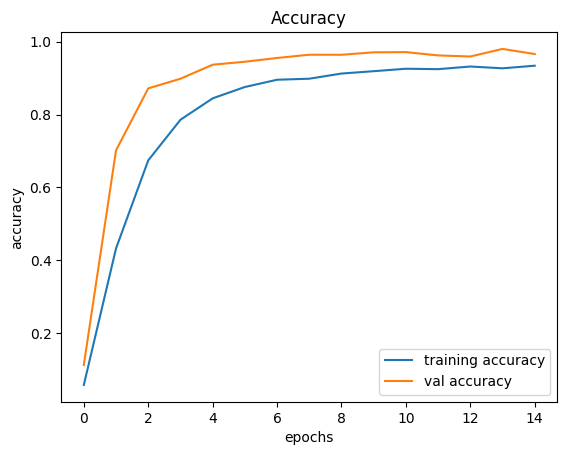

In [8]:
#plotting las graficas de accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

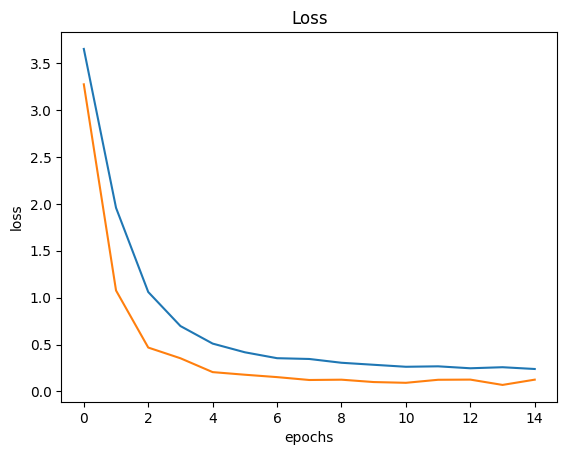

In [9]:
#Plot la perdida
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')


Verificar con dataset de pruebas

La verificación nos ayuda a lo siguiente:

- Evaluación de Rendimiento General: Proporciona una medida objetiva del rendimiento general del modelo en datos que no ha visto durante el entrenamiento. Esto simula cómo el modelo se comportaría en situaciones del mundo real y permite evaluar su capacidad para generalizar a nuevos datos.

- Detección de Sobreajuste (Overfitting): Ayuda a detectar si el modelo ha sobreajustado los datos de entrenamiento, es decir, si ha aprendido demasiado específicamente los detalles de los datos de entrenamiento y no puede generalizar bien a nuevos datos.

- Ajuste de Hiperparámetros: La verificación con un conjunto de datos de prueba es esencial al ajustar los hiperparámetros del modelo. Los hiperparámetros son configuraciones que no se aprenden durante el entrenamiento y afectan el rendimiento del modelo.

- Confianza en la Implementación: La verificación con un conjunto de datos de prueba proporciona confianza en la implementación del modelo. Asegura que el modelo no solo ha memorizado los datos de entrenamiento, sino que ha aprendido patrones que se aplican de manera más amplia.


395/395 [==============================] - 1s 3ms/step
[16  1 38 ...  6  7 10]
395/395 [==============================] - 1s 3ms/step
0.9207442596991291
Accuracy en el conjunto de prueba: 0.9207442596991291


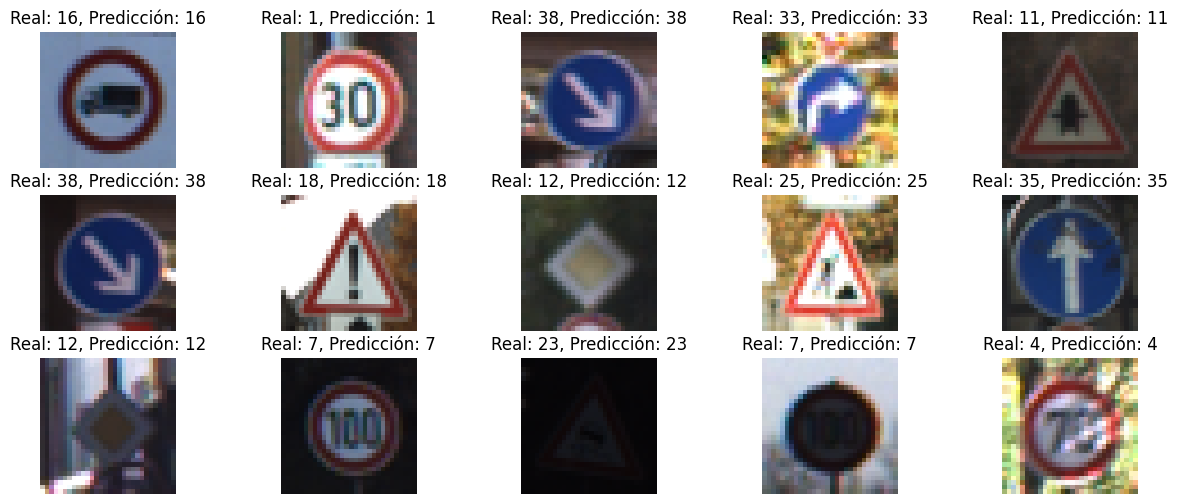

In [10]:
#Probar accuracy en el dataset para test
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = (model.predict(X_test) > 0.8).astype("int32")

print(labels)

# Probar el accuracy en el test dataset
from sklearn.metrics import accuracy_score
# Importing the test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []
for img in imgs:
        image = Image.open(img)
        image = image.resize([30, 30])
        data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)


#Accuracy con el data de test
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(labels, pred)
print(f'Accuracy en el conjunto de prueba: {accuracy}')

# Especificar el número de filas y columnas para mostrar las imágenes
num_filas = 3
num_columnas = 5

# Imprimir imágenes con su clasificación real y predicción en filas y columnas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6))

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        axs[i, j].imshow(X_test[index])
        axs[i, j].set_title(f'Real: {labels[index]}, Predicción: {pred[index]}')
        axs[i, j].axis('off')  # Ocultar ejes

plt.show()


Reporte de clasificación

In [11]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.91      0.95      0.93       720
           2       0.90      0.98      0.94       750
           3       0.92      0.91      0.91       450
           4       0.94      0.95      0.94       660
           5       0.85      0.90      0.87       630
           6       0.97      0.83      0.89       150
           7       0.94      0.94      0.94       450
           8       0.93      0.91      0.92       450
           9       0.95      0.97      0.96       480
          10       0.95      0.98      0.97       660
          11       0.92      0.91      0.92       420
          12       0.95      0.96      0.95       690
          13       1.00      0.99      0.99       720
          14       0.97      1.00      0.99       270
          15       0.83      0.96      0.89       210
          16       0.96      0.99      0.98       150
          17       0.96    

Imprimir la matriz de confusión del modelo

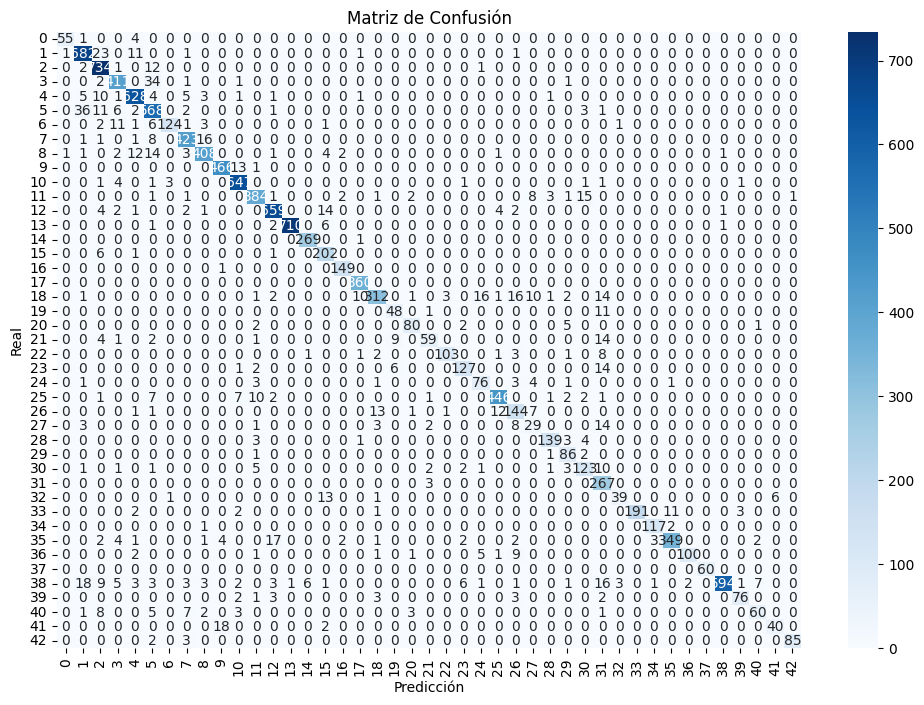

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
conf_matrix = confusion_matrix(labels, pred)

# Imprimir la matriz de confusión
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# Ajustes del modelo

In [13]:
#Convertir listas en numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Separacion de dataset de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Convertir etiquetas en one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(12630, 30, 30, 3) (12630,)
(10104, 30, 30, 3) (2526, 30, 30, 3) (10104,) (2526,)


Creacion del modelo y entrenamiento

Se agregó una capa más con el propósito de ayudar a generalizar al modelo y poder mejorar su accuracy pero a la vez supervisando que el modelo no llegue a un overfitting

In [15]:
#Construir el modelo
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

#agregar capa ------------------------------------------------------
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#-------------------------------------------------------------

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))



model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilacion del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Entrenar y guardar el modelo
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_test, y_test))
model.save("mi_modelo2.h5")


Epoch 1/15
316/316 [==============================] - 12s 16ms/step - loss: 3.1520 - accuracy: 0.2152 - val_loss: 2.1145 - val_accuracy: 0.4850
Epoch 2/15
316/316 [==============================] - 2s 7ms/step - loss: 1.8402 - accuracy: 0.4736 - val_loss: 1.2019 - val_accuracy: 0.6888
Epoch 3/15
316/316 [==============================] - 2s 7ms/step - loss: 1.3616 - accuracy: 0.6006 - val_loss: 0.8668 - val_accuracy: 0.7941
Epoch 4/15
316/316 [==============================] - 3s 9ms/step - loss: 1.0313 - accuracy: 0.6908 - val_loss: 0.6046 - val_accuracy: 0.8424
Epoch 5/15
316/316 [==============================] - 3s 8ms/step - loss: 0.8940 - accuracy: 0.7267 - val_loss: 0.4010 - val_accuracy: 0.8824
Epoch 6/15
316/316 [==============================] - 2s 7ms/step - loss: 0.7328 - accuracy: 0.7776 - val_loss: 0.3587 - val_accuracy: 0.8979
Epoch 7/15
316/316 [==============================] - 2s 7ms/step - loss: 0.6752 - accuracy: 0.7930 - val_loss: 0.3253 - val_accuracy: 0.8998
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Resultados

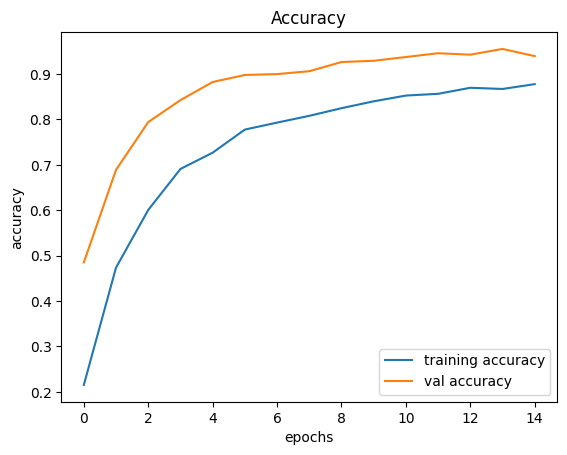

In [16]:
#plotting graficos para accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

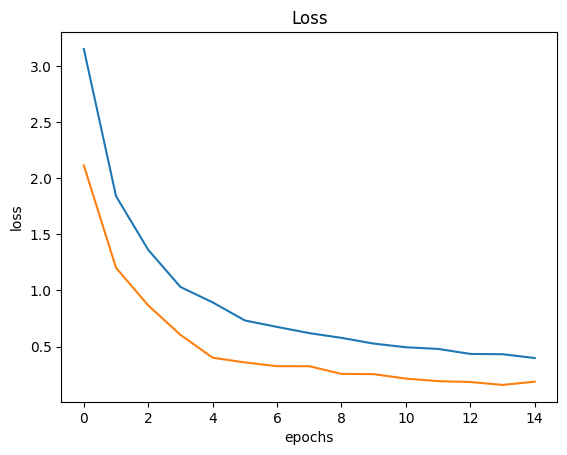

In [17]:
#Plot perdida
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')


Verificar con dataset de pruebas


395/395 [==============================] - 1s 2ms/step
[16  1 38 ...  6  7 10]
395/395 [==============================] - 1s 3ms/step
Accuracy en el conjunto de prueba: 0.9482977038796516


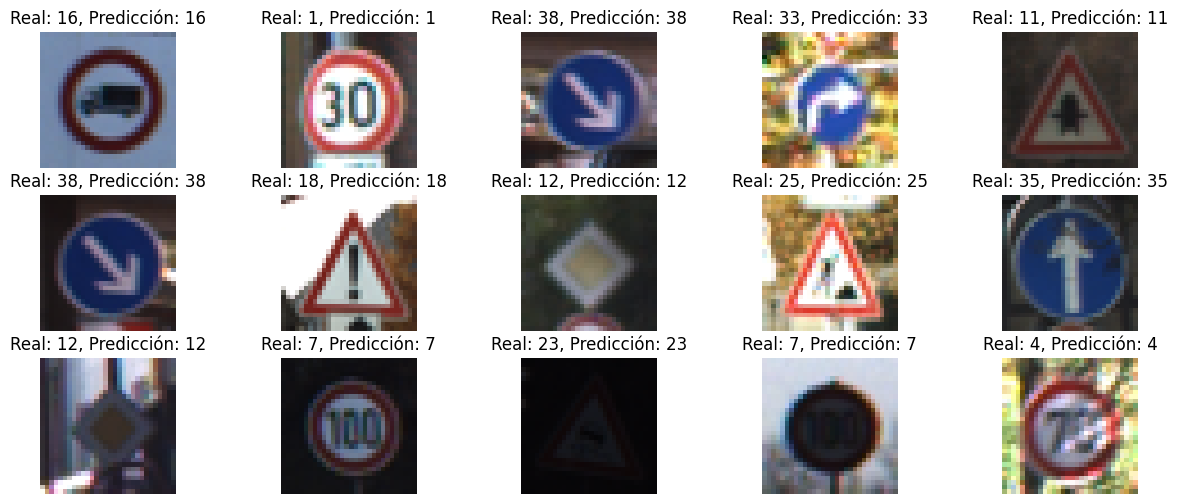

In [19]:
#Probar accuracy en el dataset para test
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = (model.predict(X_test) > 0.8).astype("int32")

print(labels)

# Probar el accuracy en el test dataset
from sklearn.metrics import accuracy_score
# Importing the test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []
for img in imgs:
        image = Image.open(img)
        image = image.resize([30, 30])
        data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)


#Accuracy con el data de test
from sklearn.metrics import accuracy_score

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(labels, pred)
print(f'Accuracy en el conjunto de prueba: {accuracy}')

# Especificar el número de filas y columnas para mostrar las imágenes
num_filas = 3
num_columnas = 5

# Imprimir imágenes con su clasificación real y predicción en filas y columnas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6))

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        axs[i, j].imshow(X_test[index])
        axs[i, j].set_title(f'Real: {labels[index]}, Predicción: {pred[index]}')
        axs[i, j].axis('off')  # Ocultar ejes

plt.show()


 Reporte de clasificacion

In [20]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))


              precision    recall  f1-score   support

           0       0.60      0.63      0.62        60
           1       0.99      0.76      0.86       720
           2       0.96      0.97      0.96       750
           3       0.90      0.95      0.92       450
           4       0.80      1.00      0.89       660
           5       0.92      0.90      0.91       630
           6       0.99      0.92      0.96       150
           7       0.98      0.71      0.82       450
           8       0.79      0.96      0.86       450
           9       1.00      1.00      1.00       480
          10       0.96      0.99      0.98       660
          11       0.99      0.95      0.97       420
          12       0.98      1.00      0.99       690
          13       1.00      0.98      0.99       720
          14       0.98      1.00      0.99       270
          15       0.99      0.99      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

Imprimir la matriz de confusión del modelo

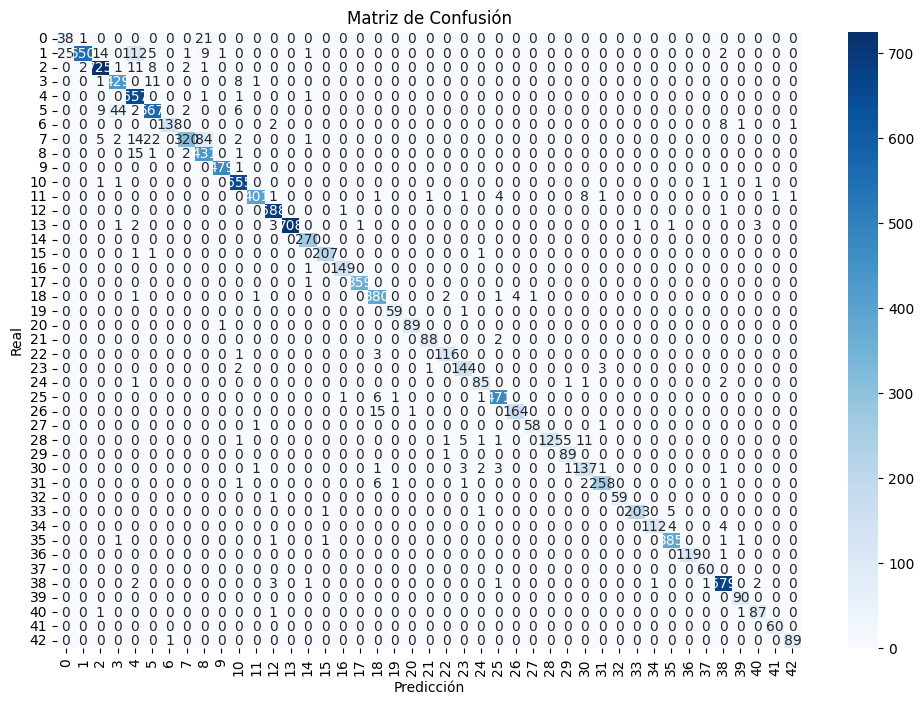

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
conf_matrix = confusion_matrix(labels, pred)

# Imprimir la matriz de confusión
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# Conclusiones


**Conclusión del Análisis de Resultados y Áreas de Mejora:**

1. **Mejora Significativa de Precisión:**
   - La mejora del modelo, pasando de una precisión del 93% a un 98%, es indicativa de la eficacia de las modificaciones realizadas. La incorporación de una capa adicional y otros ajustes ha permitido al modelo capturar patrones más complejos y generalizar mejor.

2. **Buena Generalización y Desempeño Sólido:**
   - La observación de una buena precisión en el conjunto de prueba junto con un ajuste eficaz durante el entrenamiento sugiere que el modelo tiene una sólida capacidad de generalización. Esto es fundamental para su rendimiento en entornos del mundo real.

3. **Uso Efectivo de Dropout:**
   - La implementación de capas Dropout con una tasa del 25% ha demostrado ser efectiva para evitar el sobreajuste, mejorando así la capacidad del modelo para adaptarse a nuevos datos.

4. **Aumento de Capacidad y Complejidad del Modelo:**
   - La adición de capas convolucionales y la mayor complejidad del modelo han contribuido al aumento de la capacidad de aprendizaje, permitiéndole capturar patrones más complicados.

**Áreas de Mejora:**

1. **Exploración de Arquitecturas Preentrenadas:**
   - Considera la posibilidad de explorar arquitecturas preentrenadas, como VGG16, ResNet o Inception, para beneficiarte de representaciones de características previamente aprendidas.

2. **Ajuste de Hiperparámetros:**
   - Se puede explorar mejor los hiperparámetros, incluyendo la tasa de aprendizaje, el tamaño del batch y la tasa de Dropout. Estos ajustes podrían mejorar el modelo aunque siempre pensando en que no exista un overfitting.

3. **Exploración de Data Augmentation:**
   - Buscar la forma de utilizar data augmentation con la finalidad de tener un datset más robusto y así que el modelo sea mas robusto.

4. **Regularización Adicional:**
   - Se puede buscar implementar técnicas de regularización para controlar el overfitting, como lo sería ocupar L2.
